***Import Library***

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import streamlit as st
import google.generativeai as genai
from sklearn.model_selection import train_test_split   
from sklearn.metrics import mean_absolute_error, r2_score

***Data Exploration***

In [33]:
global_df = pd.read_csv("global_salary.csv")
salary_df = pd.read_csv("Salary_Data.csv")

Salary

In [34]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [35]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [36]:
salary_df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [37]:
salary_df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [38]:
salary_df.dropna(inplace=True)

In [39]:
salary_df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [40]:
salary_df.duplicated().sum()

4911

In [41]:
salary_df.drop_duplicates(inplace=True)

In [42]:
salary_df.duplicated().sum()

0

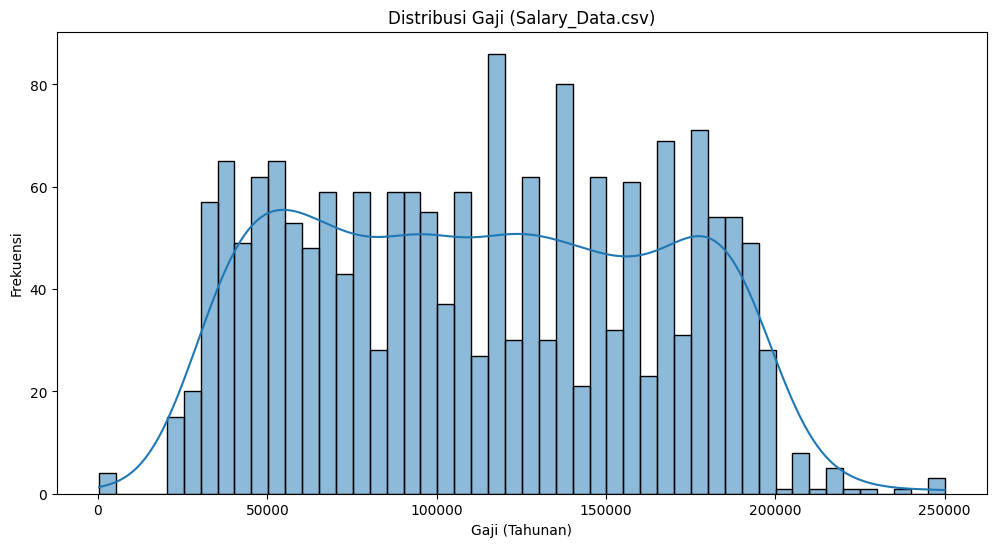

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(salary_df['Salary'].dropna(), bins=50, kde=True)
plt.title('Distribusi Gaji (Salary_Data.csv)')
plt.xlabel('Gaji (Tahunan)')
plt.ylabel('Frekuensi')
plt.show()

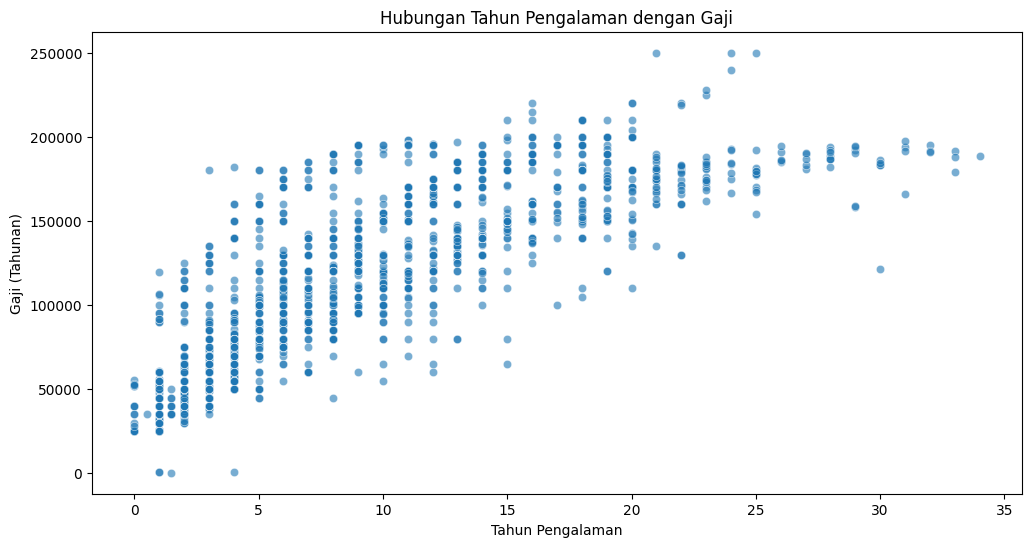

In [44]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=salary_df, x='Years of Experience', y='Salary', alpha=0.6)
plt.title('Hubungan Tahun Pengalaman dengan Gaji')
plt.xlabel('Tahun Pengalaman')
plt.ylabel('Gaji (Tahunan)')
plt.show()

C:\Users\Tuan Muda\AppData\Local\Temp\ipykernel_6036\392054549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_jobs.values, y=top_15_jobs.index, palette='viridis')


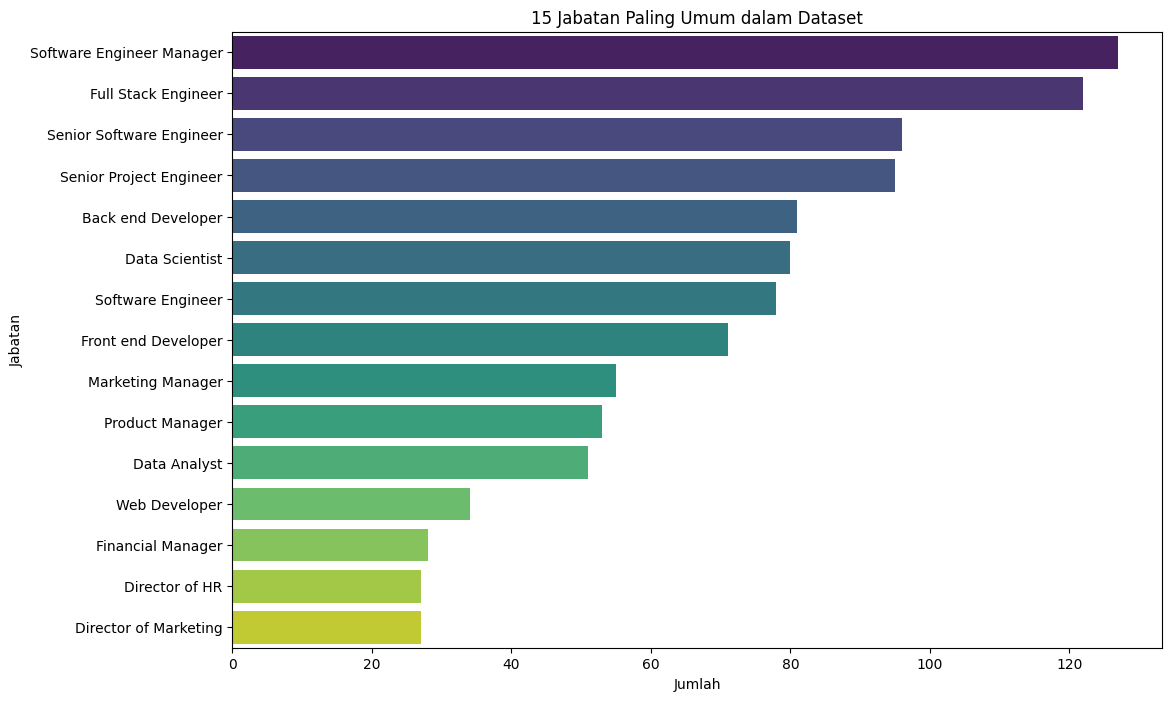

In [45]:
plt.figure(figsize=(12, 8))
top_15_jobs = salary_df['Job Title'].value_counts().nlargest(15)
sns.barplot(x=top_15_jobs.values, y=top_15_jobs.index, palette='viridis')
plt.title('15 Jabatan Paling Umum dalam Dataset')
plt.xlabel('Jumlah')
plt.ylabel('Jabatan')
plt.show()

Global Salary

In [46]:
global_df.head()

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,Afghanistan,Asia,Monthly,853.74,1001.15,252.53,4460.97
1,Aland Islands,Europe,Monthly,3319.24,3858.35,972.52,17124.74
2,Albania,Europe,Monthly,832.84,956.92,241.22,4258.49
3,Algeria,Africa,Monthly,1148.84,1308.81,330.11,5824.18
4,American Samoa,Oceania,Monthly,1390.00,1570.00,400.00,6980.00


In [47]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    221 non-null    object 
 1   continent_name  221 non-null    object 
 2   wage_span       221 non-null    object 
 3   median_salary   221 non-null    float64
 4   average_salary  221 non-null    float64
 5   lowest_salary   221 non-null    float64
 6   highest_salary  221 non-null    float64
dtypes: float64(4), object(3)
memory usage: 12.2+ KB


In [48]:
global_df.describe()

,median_salary,average_salary,lowest_salary,highest_salary
count,221.000000,221.000000,221.000000,221.000000
mean,1762.631906,1982.339812,502.783204,8802.165619
std,1634.708716,1835.429193,470.073328,8140.210641
min,0.261335,0.285524,0.072092,1.271103
25%,567.210000,651.000000,163.930000,2900.480000
50%,1227.460000,1344.230000,339.450000,5974.360000
75%,2389.010000,2740.000000,690.000000,12050.740000
max,9836.070000,11292.900000,2850.270000,50363.930000


In [49]:
global_df.isna().sum()

country_name      0
continent_name    0
wage_span         0
median_salary     0
average_salary    0
lowest_salary     0
highest_salary    0
dtype: int64

In [50]:
global_df.duplicated().sum()

0

C:\Users\Tuan Muda\AppData\Local\Temp\ipykernel_6036\1416188689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_countries, x='average_salary', y='country_name', palette='plasma')


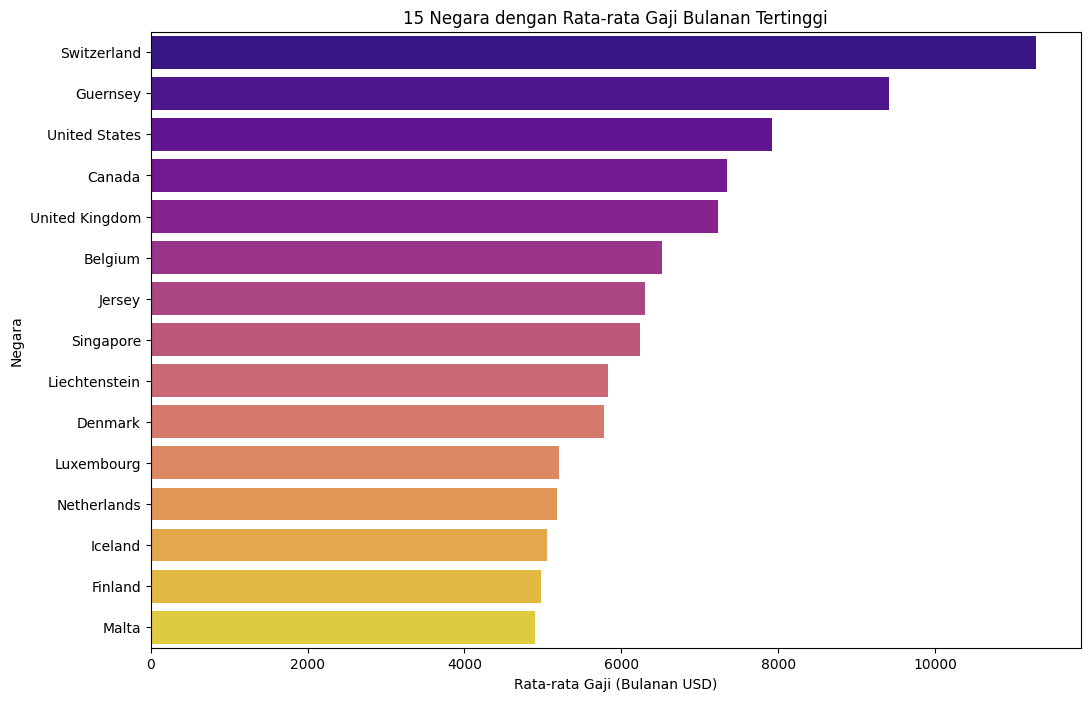

In [51]:
plt.figure(figsize=(12, 8))
top_15_countries = global_df.nlargest(15, 'average_salary')
sns.barplot(data=top_15_countries, x='average_salary', y='country_name', palette='plasma')
plt.title('15 Negara dengan Rata-rata Gaji Bulanan Tertinggi')
plt.xlabel('Rata-rata Gaji (Bulanan USD)')
plt.ylabel('Negara')
plt.show()

***Data Modeling***

In [52]:
df = salary_df.copy()

In [53]:
features = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']
X = df[features]
y = df['Salary']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
categorical_features = ['Gender', 'Education Level', 'Job Title']
numerical_features = ['Age', 'Years of Experience']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

In [56]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Age',
                                                   'Years of Experience']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('regressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

***Evaluasi Model***

In [57]:
y_pred = model_pipeline.predict(X_test)

In [58]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [59]:
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Artinya, secara rata-rata, prediksi model meleset sekitar ${mae:,.2f} dari gaji sebenarnya.")
print("------------------------------------------------------------------------------------------" )
print(f"R-squared (R²): {r2:.4f}")
print(f"Artinya, model dapat menjelaskan sekitar {r2:.1%} dari variasi data gaji.")


Mean Absolute Error (MAE): $9,754.22
Artinya, secara rata-rata, prediksi model meleset sekitar $9,754.22 dari gaji sebenarnya.
------------------------------------------------------------------------------------------
R-squared (R²): 0.9148
Artinya, model dapat menjelaskan sekitar 91.5% dari variasi data gaji.


In [60]:
joblib.dump(model_pipeline, 'salary_model.pkl')

['salary_model.pkl']

***Deployment***

In [78]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import google.generativeai as genai
import os
from dotenv import load_dotenv
import plotly.express as px
import networkx as nx
from fpdf import FPDF

st.set_page_config(layout="wide", page_title="Career Navigator AI")
load_dotenv()

@st.cache_data
def load_all_data():
    salary_df_raw = pd.read_csv('Salary_Data.csv')
    salary_df_processed = salary_df_raw.drop_duplicates().copy()
    salary_df_processed.dropna(subset=['Salary', 'Job Title', 'Years of Experience', 'Gender', 'Age', 'Education Level'], inplace=True)
    
    global_df = pd.read_csv('global_salary.csv')
    global_df['yearly_average_salary'] = global_df['average_salary'] * 12
    
    unique_job_titles = sorted(salary_df_processed['Job Title'].unique())
    unique_countries = sorted(global_df['country_name'].unique())
    unique_education = sorted(salary_df_processed['Education Level'].unique())
    unique_gender = sorted(salary_df_processed['Gender'].unique())
    
    return salary_df_processed, global_df, unique_job_titles, unique_countries, unique_education, unique_gender

@st.cache_resource
def load_model():
    try:
        model = joblib.load('salary_model.pkl')
    except FileNotFoundError:
        st.error("File model 'salary_model.pkl' tidak ditemukan. Pastikan Anda sudah menjalankan skrip pelatihan model.")
        model = None
    return model

@st.cache_resource
def build_career_graph(_df):
    G = nx.DiGraph()
    job_data = _df.groupby('Job Title').agg(avg_salary=('Salary', 'mean')).reset_index()

    for _, row in job_data.iterrows():
        G.add_node(row['Job Title'], salary=row['avg_salary'])

    titles = job_data['Job Title'].tolist()
    for u in titles:
        for v in titles:
            if u == v: continue
            
            is_promotion = (u.replace("Junior ", "") == v) or (u == v.replace("Senior ", "")) or \
                           (u.replace("Jr. ", "") == v) or (u == v.replace("Sr. ", ""))
            if is_promotion:
                salary_gain = G.nodes[v]['salary'] - G.nodes[u]['salary']
                if salary_gain > 0:
                    G.add_edge(u, v, weight=salary_gain, reason="Promosi Hirarkis")
            
            u_base = u.replace("Senior ", "").replace("Junior ", "").replace("Manager", "").strip()
            v_base = v.replace("Senior ", "").replace("Junior ", "").replace("Manager", "").strip()
            if "Analyst" in u_base and "Scientist" in v_base or "Scientist" in u_base and "Engineer" in v_base:
                salary_gain = G.nodes[v]['salary'] - G.nodes[u]['salary']
                if salary_gain > 0:
                    G.add_edge(u, v, weight=salary_gain, reason="Transisi Keahlian")
    return G

def find_best_career_path(graph, start_node, steps=3):
    if start_node not in graph: return None, 0
    path, total_gain, current_node = [start_node], 0, start_node
    for _ in range(steps):
        neighbors = list(graph.successors(current_node))
        if not neighbors: break
        positive_gain_neighbors = {n: graph.edges[current_node, n]['weight'] for n in neighbors if graph.edges[current_node, n]['weight'] > 0}
        if not positive_gain_neighbors: break
        best_next_node = max(positive_gain_neighbors, key=positive_gain_neighbors.get)
        gain = positive_gain_neighbors[best_next_node]
        total_gain += gain
        path.append(best_next_node)
        current_node = best_next_node
    return path, total_gain

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 15)
        self.cell(0, 10, 'Laporan Analisis Karier - Career Navigator AI', 0, 1, 'C')
        self.ln(5)

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(2)

    def chapter_body(self, body):
        self.set_font('Arial', '', 11)
        self.multi_cell(0, 5, body)
        self.ln()
        
    def add_table(self, header, data):
        self.set_font('Arial', 'B', 10)
        col_width = self.w / 3.5 
        for h in header:
            self.cell(col_width, 7, h, 1, 0, 'C')
        self.ln()
        self.set_font('Arial', '', 10)
        for row in data:
            for item in row:
                self.cell(col_width, 6, item, 1)
            self.ln()
        self.ln()

def generate_pdf_report(report_data):
    pdf = PDF()
    pdf.add_page()
    
    pdf.chapter_title('Ringkasan Profil')
    profile_body = (
        f"Jabatan: {report_data['job_title']}\n"
        f"Pengalaman: {report_data['experience']} tahun\n"
        f"Pendidikan: {report_data['education']}\n"
        f"Usia: {report_data['age']} tahun\n"
        f"Jenis Kelamin: {report_data['gender']}\n"
        f"Lokasi: {report_data['country']}"
    )
    pdf.chapter_body(profile_body)

    pdf.chapter_title(f"Analisis Komparasi Gaji (Prediksi: ${report_data['predicted_salary']:,.0f} USD)")
    table_header = ['Kategori Perbandingan', 'Rata-rata Gaji', 'Perbandingan vs Anda']
    table_data = [
        ['Peer Group Serupa', f"${report_data['peer_group_avg_salary']:,.0f}", f"{report_data['peer_vs_you']:.1%}"],
        ['Rata-rata Nasional', f"${report_data['national_avg_salary']:,.0f}", f"{report_data['national_vs_you']:.1%}"]
    ]
    pdf.add_table(table_header, table_data)

    if report_data['path'] and len(report_data['path']) > 1:
        pdf.chapter_title('Simulasi Jalur Karier Optimal')
        pdf.chapter_body(f"Jalur: {' -> '.join(report_data['path'])}\nPotensi Kenaikan Gaji: ~${report_data['gain']:,.0f} USD")

    if report_data['ai_response']:
        pdf.chapter_title('Rekomendasi Cerdas dari Navigator AI')
        ai_response_encoded = report_data['ai_response'].encode('latin-1', 'replace').decode('latin-1')
        pdf.chapter_body(ai_response_encoded)
        
    return bytes(pdf.output(dest='S'))


salary_df, global_df, unique_job_titles, unique_countries, unique_education, unique_gender = load_all_data()
model = load_model()
if salary_df is not None:
    career_graph = build_career_graph(salary_df)

st.title("🛰️ Career Navigator AI")
st.markdown("Platform Analisis Karier Komprehensif dengan Perbandingan Peer-Group, Simulasi Jalur Karier, dan Wawasan Global.")

tab1, tab2 = st.tabs([" 🧭 Navigator Karier Personal ", " 🌏 Wawasan Global "])

with tab1:
    with st.sidebar:
        st.header("👤 Profil Profesional Anda")
        age = st.number_input('Usia Anda', min_value=18, max_value=70, value=30, step=1)
        gender = st.selectbox('Jenis Kelamin', options=unique_gender, index=1 if 'Male' in unique_gender else 0)
        education = st.selectbox('Pendidikan Terakhir', options=unique_education, index=0)
        job_title = st.selectbox('Jabatan Anda', options=unique_job_titles, index=unique_job_titles.index("Data Analyst") if "Data Analyst" in unique_job_titles else 0)
        experience = st.slider('Pengalaman Kerja (Tahun)', min_value=0, max_value=40, value=5, step=1)
        country = st.selectbox('Negara Domisili Anda', options=unique_countries, index=unique_countries.index("Switzerland") if "Switzerland" in unique_countries else 0)
        st.markdown("---")
        analyze_button = st.button('🚀 Hasilkan Analisis & Rekomendasi', type="primary", use_container_width=True)

    if analyze_button and model is not None:
        with st.spinner('Navigator AI sedang melakukan analisis mendalam...'):
            input_features = pd.DataFrame([[age, gender, education, job_title, experience]], columns=['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience'])
            predicted_salary = model.predict(input_features)[0]
            
            exp_range = [experience - 2, experience + 2]
            peer_group_df = salary_df[(salary_df['Job Title'] == job_title) & (salary_df['Education Level'] == education) & (salary_df['Years of Experience'].between(exp_range[0], exp_range[1]))]
            peer_group_avg_salary = peer_group_df['Salary'].mean()
            
            national_avg_salary = global_df.loc[global_df['country_name'] == country, 'yearly_average_salary'].iloc[0]
            
            st.header(f"📊 Laporan Analisis untuk: {job_title}")
            st.markdown(f"Dengan **{experience} tahun** pengalaman di **{country}**.")
            
            st.subheader("Analisis Komparasi Gaji (Tahunan USD)")
            cols_metric = st.columns(3)
            cols_metric[0].metric(label="Prediksi Gaji Anda", value=f"${predicted_salary:,.0f}")
            if pd.notna(peer_group_avg_salary):
                cols_metric[1].metric(label="Rata-rata Gaji Peer Group", value=f"${peer_group_avg_salary:,.0f}", delta=f"{(predicted_salary/peer_group_avg_salary - 1):.1%}")
            cols_metric[2].metric(label="Rata-rata Gaji Nasional", value=f"${national_avg_salary:,.0f}", delta=f"{(predicted_salary/national_avg_salary - 1):.1%}")

            st.markdown("---")
            st.header("✨ Simulasi Jalur Karier Optimal Anda")
            path, gain = find_best_career_path(career_graph, job_title)
            
            if path and len(path) > 1:
                path_str = " ➡️ ".join([f"**{node}**" for node in path])
                st.markdown(f"#### {path_str}")
                st.success(f"Potensi total kenaikan gaji dari jalur ini adalah sekitar **${gain:,.0f} USD**.")
            else:
                st.info("Kami tidak dapat menemukan jalur promosi yang jelas untuk posisi Anda dari data yang tersedia.")
            
            st.markdown("---")
            st.header("🧠 Rekomendasi Cerdas dari Navigator AI")
            ai_response_md = ""
            try:
                api_key = os.getenv("GEMINI_API_KEY")
                if api_key:
                    genai.configure(api_key=api_key)
                    gemini_model = genai.GenerativeModel('gemini-1.5-flash')
                    prompt = f"""
                    **Peran Anda:** Anda adalah 'Career Navigator AI', konsultan karier virtual yang sangat analitis dan suportif.
                    **Tugas Anda:** Analisis data pengguna yang sangat detail ini. Berdasarkan HANYA pada data ini, berikan saran yang tajam, spesifik, dan dapat ditindaklanjuti. Jangan meminta info tambahan.
                    **Data Pengguna Lengkap:**
                    - Jabatan: {job_title}, Pengalaman: {experience} tahun
                    - Pendidikan: {education}, Usia: {age}, Gender: {gender}
                    - Lokasi: {country}
                    - Prediksi Gaji: ${predicted_salary:,.0f} USD
                    - Perbandingan vs Peer Group: {(predicted_salary/peer_group_avg_salary - 1) if pd.notna(peer_group_avg_salary) and peer_group_avg_salary > 0 else 0:.1%}
                    - Simulasi Jalur Karier Berikutnya: {' -> '.join(path) if path and len(path) > 1 else 'Tidak ada jalur jelas yang ditemukan'}

                    **Struktur Output (Gunakan Format Markdown):**
                    ### Analisis Profil Singkat
                    Berikan 1-2 kalimat analisis singkat tentang posisi pengguna berdasarkan perbandingan dengan peer group.
                    ### Rekomendasi Peningkatan Skill
                    Sarankan 2 skill paling berdampak yang bisa dipelajari untuk mencapai jalur karier yang disimulasikan atau meningkatkan posisi tawar.
                    ### Validasi Jalur Karier
                    Berikan komentar singkat tentang jalur karier yang disimulasikan. Apakah realistis? Apa yang perlu dipersiapkan untuk langkah pertama?
                    ### Wawasan Global & Industri Lokal
                    1. **Potensi Kerja Remote:** Berikan wawasan tentang kultur kerja remote untuk profesi rekomendasi peningkatan skill dari '{job_title}'.
                    2. **Industri Lokal ({country}):** Sebutkan 3 industri di '{country}' yang sedang butuh talenta seperti yang peningkatan skill yang direkomendasikan anda. 
                    """
                    ai_response = gemini_model.generate_content(prompt)
                    ai_response_md = ai_response.text
                    st.markdown(ai_response_md)
                else:
                    st.warning("GEMINI_API_KEY tidak ditemukan. Rekomendasi AI tidak dapat ditampilkan.")
            except Exception as e:
                st.error(f"Gagal menghubungi layanan AI: {e}")

            st.markdown("---")
            report_data_for_pdf = {
                "job_title": job_title, "experience": experience, "education": education,
                "age": age, "gender": gender, "country": country,
                "predicted_salary": predicted_salary, "peer_group_avg_salary": peer_group_avg_salary if pd.notna(peer_group_avg_salary) else 0,
                "peer_vs_you": (predicted_salary/peer_group_avg_salary - 1) if pd.notna(peer_group_avg_salary) and peer_group_avg_salary > 0 else 0,
                "national_avg_salary": national_avg_salary,
                "national_vs_you": (predicted_salary/national_avg_salary - 1),
                "path": path, "gain": gain, "ai_response": ai_response_md
            }
            pdf_data = generate_pdf_report(report_data_for_pdf)
            st.download_button(
                label="📥 Unduh Laporan Analisis Lengkap (.pdf)",
                data=pdf_data,
                file_name=f"Laporan_Karier_{job_title.replace(' ', '_')}.pdf",
                mime="application/pdf",
            )
    elif model is None:
        st.error("Model tidak dapat dimuat. Aplikasi tidak bisa menjalankan analisis.")
    else:
        st.info("Silakan isi profil Anda di sidebar kiri dan klik tombol analisis untuk memulai.")

with tab2:
    st.header("Wawasan Global: Tren Gaji dan Profesi")
    st.markdown("Analisis tren gaji dan distribusi profesi di seluruh dunia berdasarkan data kami.")
    
    if salary_df is not None and global_df is not None:
        st.subheader("Peta Gaji Tahunan Rata-rata Global (USD)")
        fig_map_global = px.choropleth(global_df, locations="country_name", locationmode="country names", color="yearly_average_salary", hover_name="country_name", color_continuous_scale=px.colors.sequential.Plasma)
        fig_map_global.update_layout(
            geo=dict(bgcolor='rgba(0,0,0,0)'), 
            paper_bgcolor='rgba(0,0,0,0)', 
            plot_bgcolor='rgba(0,0,0,0)', 
            font=dict(color="white" if st.config.get_option("theme.base") == "dark" else "black")
        )
        st.plotly_chart(fig_map_global, use_container_width=True)

        st.subheader("Top 15 Negara dengan Gaji Rata-rata Tertinggi")
        top_countries = global_df.nlargest(15, 'yearly_average_salary').sort_values(by='yearly_average_salary', ascending=True)
        fig_countries_global = px.bar(top_countries, x='yearly_average_salary', y='country_name', orientation='h', labels={'yearly_average_salary': 'Rata-rata Gaji Tahunan (USD)', 'country_name': 'Negara'}, text='yearly_average_salary', color='yearly_average_salary', color_continuous_scale='Plasma')
        fig_countries_global.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
        fig_countries_global.update_layout(
            paper_bgcolor='rgba(0,0,0,0)', 
            plot_bgcolor='rgba(0,0,0,0)',
            font=dict(color="white" if st.config.get_option("theme.base") == "dark" else "black")
        )
        st.plotly_chart(fig_countries_global, use_container_width=True)
        
        st.subheader("Top 15 Profesi dengan Gaji Rata-rata Tertinggi")
        top_jobs = salary_df.groupby('Job Title')['Salary'].mean().nlargest(15).sort_values(ascending=True)
        fig_jobs_global = px.bar(top_jobs, x='Salary', y=top_jobs.index, orientation='h', labels={'Salary': 'Rata-rata Gaji Tahunan (USD)', 'y': 'Jabatan'}, text=top_jobs.values, color='Salary', color_continuous_scale='Viridis')
        fig_jobs_global.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
        fig_jobs_global.update_layout(
            paper_bgcolor='rgba(0,0,0,0)', 
            plot_bgcolor='rgba(0,0,0,0)', 
            font=dict(color="white" if st.config.get_option("theme.base") == "dark" else "black")
        )
        st.plotly_chart(fig_jobs_global, use_container_width=True)
    else:
        st.error("Gagal memuat data untuk wawasan global.")

Overwriting app.py


In [ ]:
import os
import subprocess
import time
from pyngrok import ngrok
from dotenv import load_dotenv


load_dotenv()
NGROK_AUTH_TOKEN = os.getenv("NGROK_AUTH_TOKEN")

if not NGROK_AUTH_TOKEN:
    print("Error: NGROK_AUTH_TOKEN tidak ditemukan.")
else:
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)
    
    print("Menjalankan server Streamlit dari file 'app.py'...")
    process = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501"])

    print("Memberi waktu 5 detik agar server Streamlit siap...")
    time.sleep(5)

    try:
        public_url = ngrok.connect(8501)
        print(f"🎉 Streamlit App: {public_url}")
    except Exception as e:
        print(f"Gagal membuat tunnel ngrok: {e}")

Menjalankan server Streamlit dari file 'app.py'...
Memberi waktu 5 detik agar server Streamlit siap...
🎉 Streamlit App: NgrokTunnel: "https://5018-182-253-58-223.ngrok-free.app" -> "http://localhost:8501"


***THE END***